## Analysis 2: Analysing the level of vendor competition in Govt. contracts

In [1]:
%matplotlib inline

In [48]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS

### Reading into dataframe from saved pickle file

In [3]:
pickle_df = pd.read_pickle('../Extra/us_spending_df.pickle')
pickle_df.head()

,AgencyID,AwardType,ContractDescription,ContractPricing,ContractingAgency,ContractingAgencyCode,DUNSNumber,DateSigned,DollarsObligated,ExtentCompeted,...,RecipientName,RecipientOrContractorName,RecipientState,RecipientZipCode,TransactionNumber,TransactionStatus,TypeofSpending,TypeofTransaction,UniqueTransactionID,VendorName
2016_MA_0_1,9700: DEPT OF DEFENSE,1,FMS AND US AEGIS PRODUCTION (FCS AND SPY TRANS...,Y,1700: DEPT OF THE NAVY,1700,193049236,2016-05-27T00:00:00.000,3.658488E+08,C,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01752,0,F,C,F,0,RAYTHEON COMPANY
2016_MA_0_2,9700: DEPT OF DEFENSE,1,MODERNIZATION OF SIX PATRIOT FIRE UNITS FOR TH...,Y,2100: DEPT OF THE ARMY,2100,196882310,2016-06-23T00:00:00.000,256459280,C,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01810,2,F,C,F,2,RAYTHEON COMPANY
2016_MA_0_3,9700: DEPT OF DEFENSE,1,DDG 1002 MSE,Y,1700: DEPT OF THE NAVY,1700,184724797,2015-12-31T00:00:00.000,2.552817E+08,C,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01876,0,F,C,F,0,RAYTHEON COMPANY
2016_MA_0_4,9700: DEPT OF DEFENSE,1,QATAR ADOC CONTRACT #2 UCA DEFINITIZATION,Y,5700: DEPT OF THE AIR FORCE,5700,184724797,2015-10-16T00:00:00.000,142685024,B,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01876,14,F,C,F,14,RAYTHEON COMPANY
2016_MA_0_5,9700: DEPT OF DEFENSE,1,ADDITIONAL F414 FY15 ENGINES,N,1700: DEPT OF THE NAVY,1700,001408509,2015-12-30T00:00:00.000,121208608,C,...,GENERAL ELECTRIC COMPANY,GENERAL ELECTRIC COMPANY,MA,01905,0,F,C,F,0,GENERAL ELECTRIC COMPANY


### Displaying all the columns of dataframe pickle_df

In [4]:
pickle_df.columns

Index(['AgencyID', 'AwardType', 'ContractDescription', 'ContractPricing',
       'ContractingAgency', 'ContractingAgencyCode', 'DUNSNumber',
       'DateSigned', 'DollarsObligated', 'ExtentCompeted', 'FiscalYear',
       'FundingAgency', 'IDVAgency', 'IDVProcurementInstrumentID',
       'MajorAgency', 'MajorFundingAgency', 'ModificationNumber',
       'PSCCategoryCode', 'ParentRecipientOrCompanyName',
       'PlaceofPerformanceCongDistrict', 'PlaceofPerformanceState',
       'PlaceofPerformanceZipCode', 'PrincipalNAICSCode',
       'PrincipalPlaceCountyOrCity', 'ProcurementInstrumentID',
       'ProductorServiceCode', 'ProgramSource', 'ProgramSourceAccountCode',
       'ProgramSourceAgencyCode', 'ReasonForModification',
       'RecipientAddressLine123', 'RecipientCity',
       'RecipientCongressionalDistrict', 'RecipientName',
       'RecipientOrContractorName', 'RecipientState', 'RecipientZipCode',
       'TransactionNumber', 'TransactionStatus', 'TypeofSpending',
       'TypeofTransa

### Filter out rows that don't have value for column 'Extent Competed'

In [5]:
pickle_df = pickle_df[pickle_df['ExtentCompeted'].notnull()]

In [6]:
pickle_df['ExtentCompeted'].unique()

array(['C', 'B', 'D', 'A', 'F', 'CDO', 'G', 'NDO', 'E'], dtype=object)

### Define categories and order for Extent Competed in increasing order of openness

In [7]:
pickle_df['ExtentCompeted'] = pickle_df['ExtentCompeted'].astype('category',categories=['G','C','B','D','CDO','F','A'], ordered = True) 

In [8]:
pickle_df.describe()

,AgencyID,AwardType,ContractDescription,ContractPricing,ContractingAgency,ContractingAgencyCode,DUNSNumber,DateSigned,DollarsObligated,ExtentCompeted,...,RecipientName,RecipientOrContractorName,RecipientState,RecipientZipCode,TransactionNumber,TransactionStatus,TypeofSpending,TypeofTransaction,UniqueTransactionID,VendorName
count,704528,704528,704528,569121,704528,704528,704528,704528,704528,704496,...,704528,704528,704373,704506,704528,704528,704528,704528,704528,704528
unique,134,1,654600,3,147,139,12481,568,352276,7,...,12968,12968,80,4219,17,1,1,1,17,12968
top,9700: DEPT OF DEFENSE,1,IGF::OT::IGF,N,97AS: DEFENSE LOGISTICS AGENCY,97AS,007914906,2016-04-13T00:00:00.000,0,A,...,AMERISOURCEBERGEN DRUG CORPORATION,AMERISOURCEBERGEN DRUG CORPORATION,PA,19087,0,F,C,F,0,AMERISOURCEBERGEN DRUG CORPORATION
freq,635355,704528,1298,560741,599603,599603,383774,4097,16171,552189,...,383764,383764,603158,387667,698708,704528,704528,704528,698708,383764


### Group by ExtentCompeted

In [9]:
pickle_df['DollarsObligated'] = pickle_df['DollarsObligated'].apply(pd.to_numeric)
grouped = pickle_df.groupby('ExtentCompeted').agg({'DollarsObligated':np.mean, 'DateSigned':'count'})
grouped = grouped.rename(index=str, columns={'DateSigned':'ContractCount'})
grouped

,ContractCount,DollarsObligated
ExtentCompeted,,
G,18412,21376.431879
C,19393,755863.605133
B,4829,255083.963093
D,11678,243997.725630
CDO,110,894950.788882
F,97885,12565.271772
A,552189,33166.829701


### Plot grouped data to show the 'average amount' of DollarsObligated under each category of contract competition openness

C:\Users\parit\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


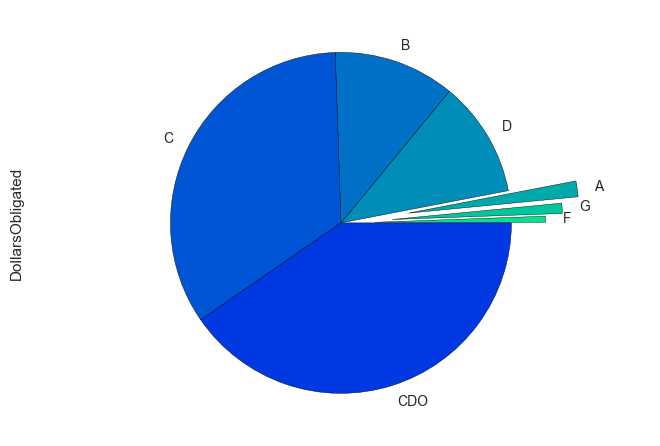

In [62]:
fig = plt.figure()
ax = plt.subplot(111)
colors = [ '#00E28E','#00C69C','#00AAAA','#008DB8','#0071C6','#0055D4','#0038E2']
explode = [0.2,0.3,0.4,0,0,0,0]
grouped_sorted = grouped['DollarsObligated'].copy()
grouped_sorted.sort()
plt.axis('equal')
grouped_sorted.plot(kind='pie', ax=ax,  fontsize=10, explode=explode, colors=colors)

plt.savefig('Analysis2/CompetitionOpennessDistribution.png')

### Conclusion: In the ExtentCompeted category 'C', there's a lot of money spent but these contracts are not open for competition. Thus, these companies benefit from a monopoly situation.

In [63]:
pickle_df_filtered = pickle_df[pickle_df['ExtentCompeted']=='C']
company_list = pickle_df_filtered['ParentRecipientOrCompanyName'].values

In [69]:
def drawWordCloud(text):
    other_stopwords = list(STOPWORDS) + ['INC', 'CORPORATION', 'COMPANY', 'nan']
    wc = WordCloud(background_color="white", max_words=2000, stopwords=set(other_stopwords)).generate(' '.join(str(v) for v in text))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    wc.to_file('Analysis2/Wordcloud.png')

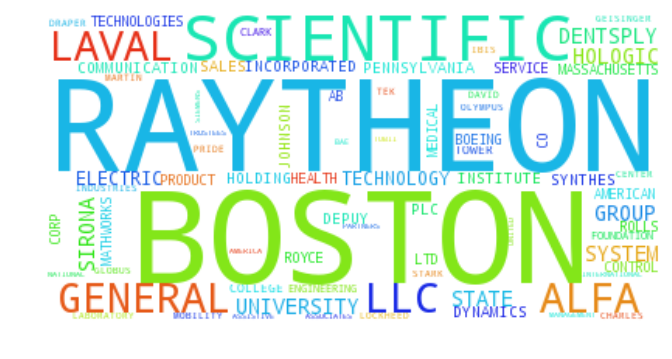

In [70]:
drawWordCloud(company_list)

### Conclusion: The above wordcloud highlights the names of the companies that operate with benefits of a monopoly